<a href="https://colab.research.google.com/github/mkirby1995/Tanzania_water_project/blob/master/Tanzania_Attempt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd

In [0]:
features = 'https://raw.githubusercontent.com/mkirby1995/Tanzania_water_project/master/train_features.csv'
target = 'https://raw.githubusercontent.com/mkirby1995/Tanzania_water_project/master/train_labels.csv'

features = pd.read_csv(features)
labels = pd.read_csv(target)

In [0]:
X_test = pd.read_csv('https://raw.githubusercontent.com/mkirby1995/Tanzania_water_project/master/test_features.csv')

In [0]:
features['latitude'] = features['latitude'].replace({0:features['latitude'].mean()})
features['longitude'] = features['longitude'].replace({0:features['longitude'].mean()})

In [0]:
!pip install geopandas

     |████████████████████████████████| 901kB 4.8MB/s 
     |████████████████████████████████| 17.9MB 32.9MB/s 
     |████████████████████████████████| 10.8MB 785kB/s 
  Stored in directory: /root/.cache/pip/wheels/db/bf/bc/06a3e1bfe0ab27d2e720ceb3cff3159398d92644c0cec2c125
Successfully built munch


In [0]:
import geopandas
import matplotlib.pyplot as plt

In [0]:
gdf = geopandas.GeoDataFrame(
    features, geometry=geopandas.points_from_xy(features.longitude, features.latitude))

In [0]:
!pip install descartes

In [0]:
gdf = gdf.merge(labels, on = gdf.index)


In [0]:
labels.head()

,id,status_group
0,69572,functional
1,8776,functional
2,34310,functional
3,67743,non functional
4,19728,functional


In [0]:
gdf.head()

,key_0,id_x,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,geometry,id_y,status_group
0,0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,POINT (34.93809275 -9.856321769999999),69572,functional
1,1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NaN,GeoData Consultants Ltd,Other,NaN,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,POINT (34.6987661 -2.14746569),8776,functional
2,2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,POINT (37.46066446 -3.82132853),34310,functional
3,3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,NaN,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,POINT (38.48616088 -11.15529772),67743,non functional
4,4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,POINT (31.13084671 -1.82535885),19728,functional


In [0]:
functional = gdf.where(gdf['status_group'] == 'functional')
repair = gdf.where(gdf['status_group'] == 'functional needs repair')
broken = gdf.where(gdf['status_group'] == 'non functional')

In [0]:
from pylab import rcParams
rcParams['figure.figsize'] = 30, 20

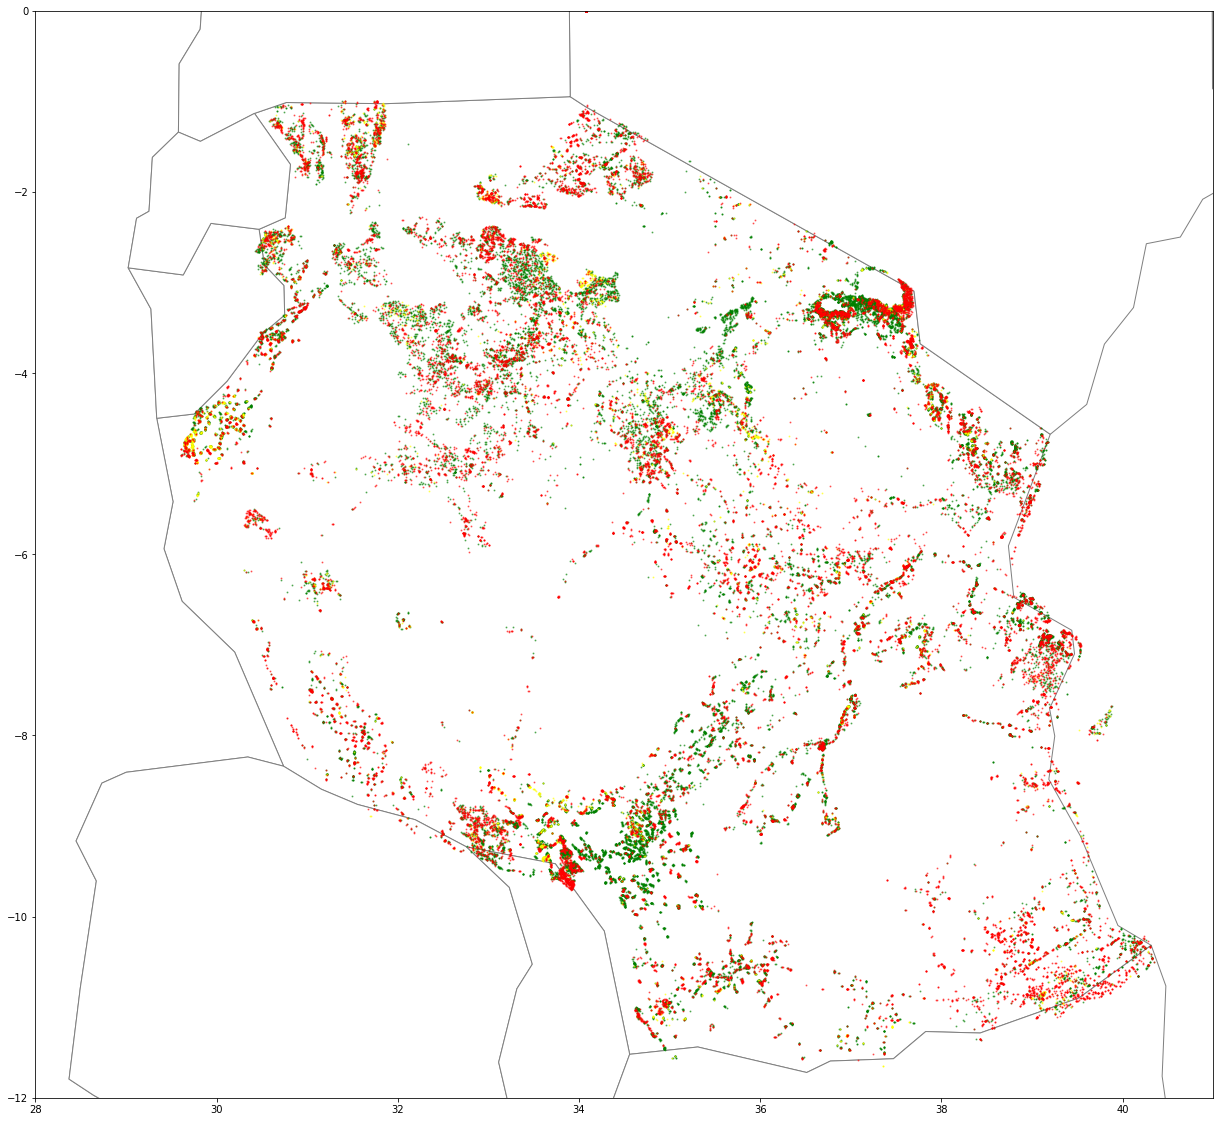

In [0]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

# We restrict to Africa.
ax = world[world.continent == 'Africa'].plot(
    color='white', edgecolor='gray')

ax.scatter(functional['longitude'], functional['latitude'],
           c='green',alpha=.5, s=1)

ax.scatter(repair['longitude'], repair['latitude'],
           c='yellow', alpha=.5, s=1)

ax.scatter(broken['longitude'], broken['latitude'],
           c='red', alpha=.5, s=1)

plt.ylim(-12, 0)
plt.xlim(28,41)

plt.show()

In [0]:
from sklearn.cluster import KMeans

coordinates = gdf[['longitude', 'latitude']]

kmeans = KMeans(n_clusters=1000)

kmeans.fit(coordinates)

labels = kmeans.labels_

pd.DataFrame(labels).head()

,0
0,358
1,472
2,888
3,503
4,246


In [0]:
clusters = pd.DataFrame(kmeans.cluster_centers_)
clusters.head()

,0,1
0,34.806074,-4.760419
1,35.657815,-10.220310
2,31.155459,-1.569190
3,37.631096,-5.445982
4,33.586372,-9.212926


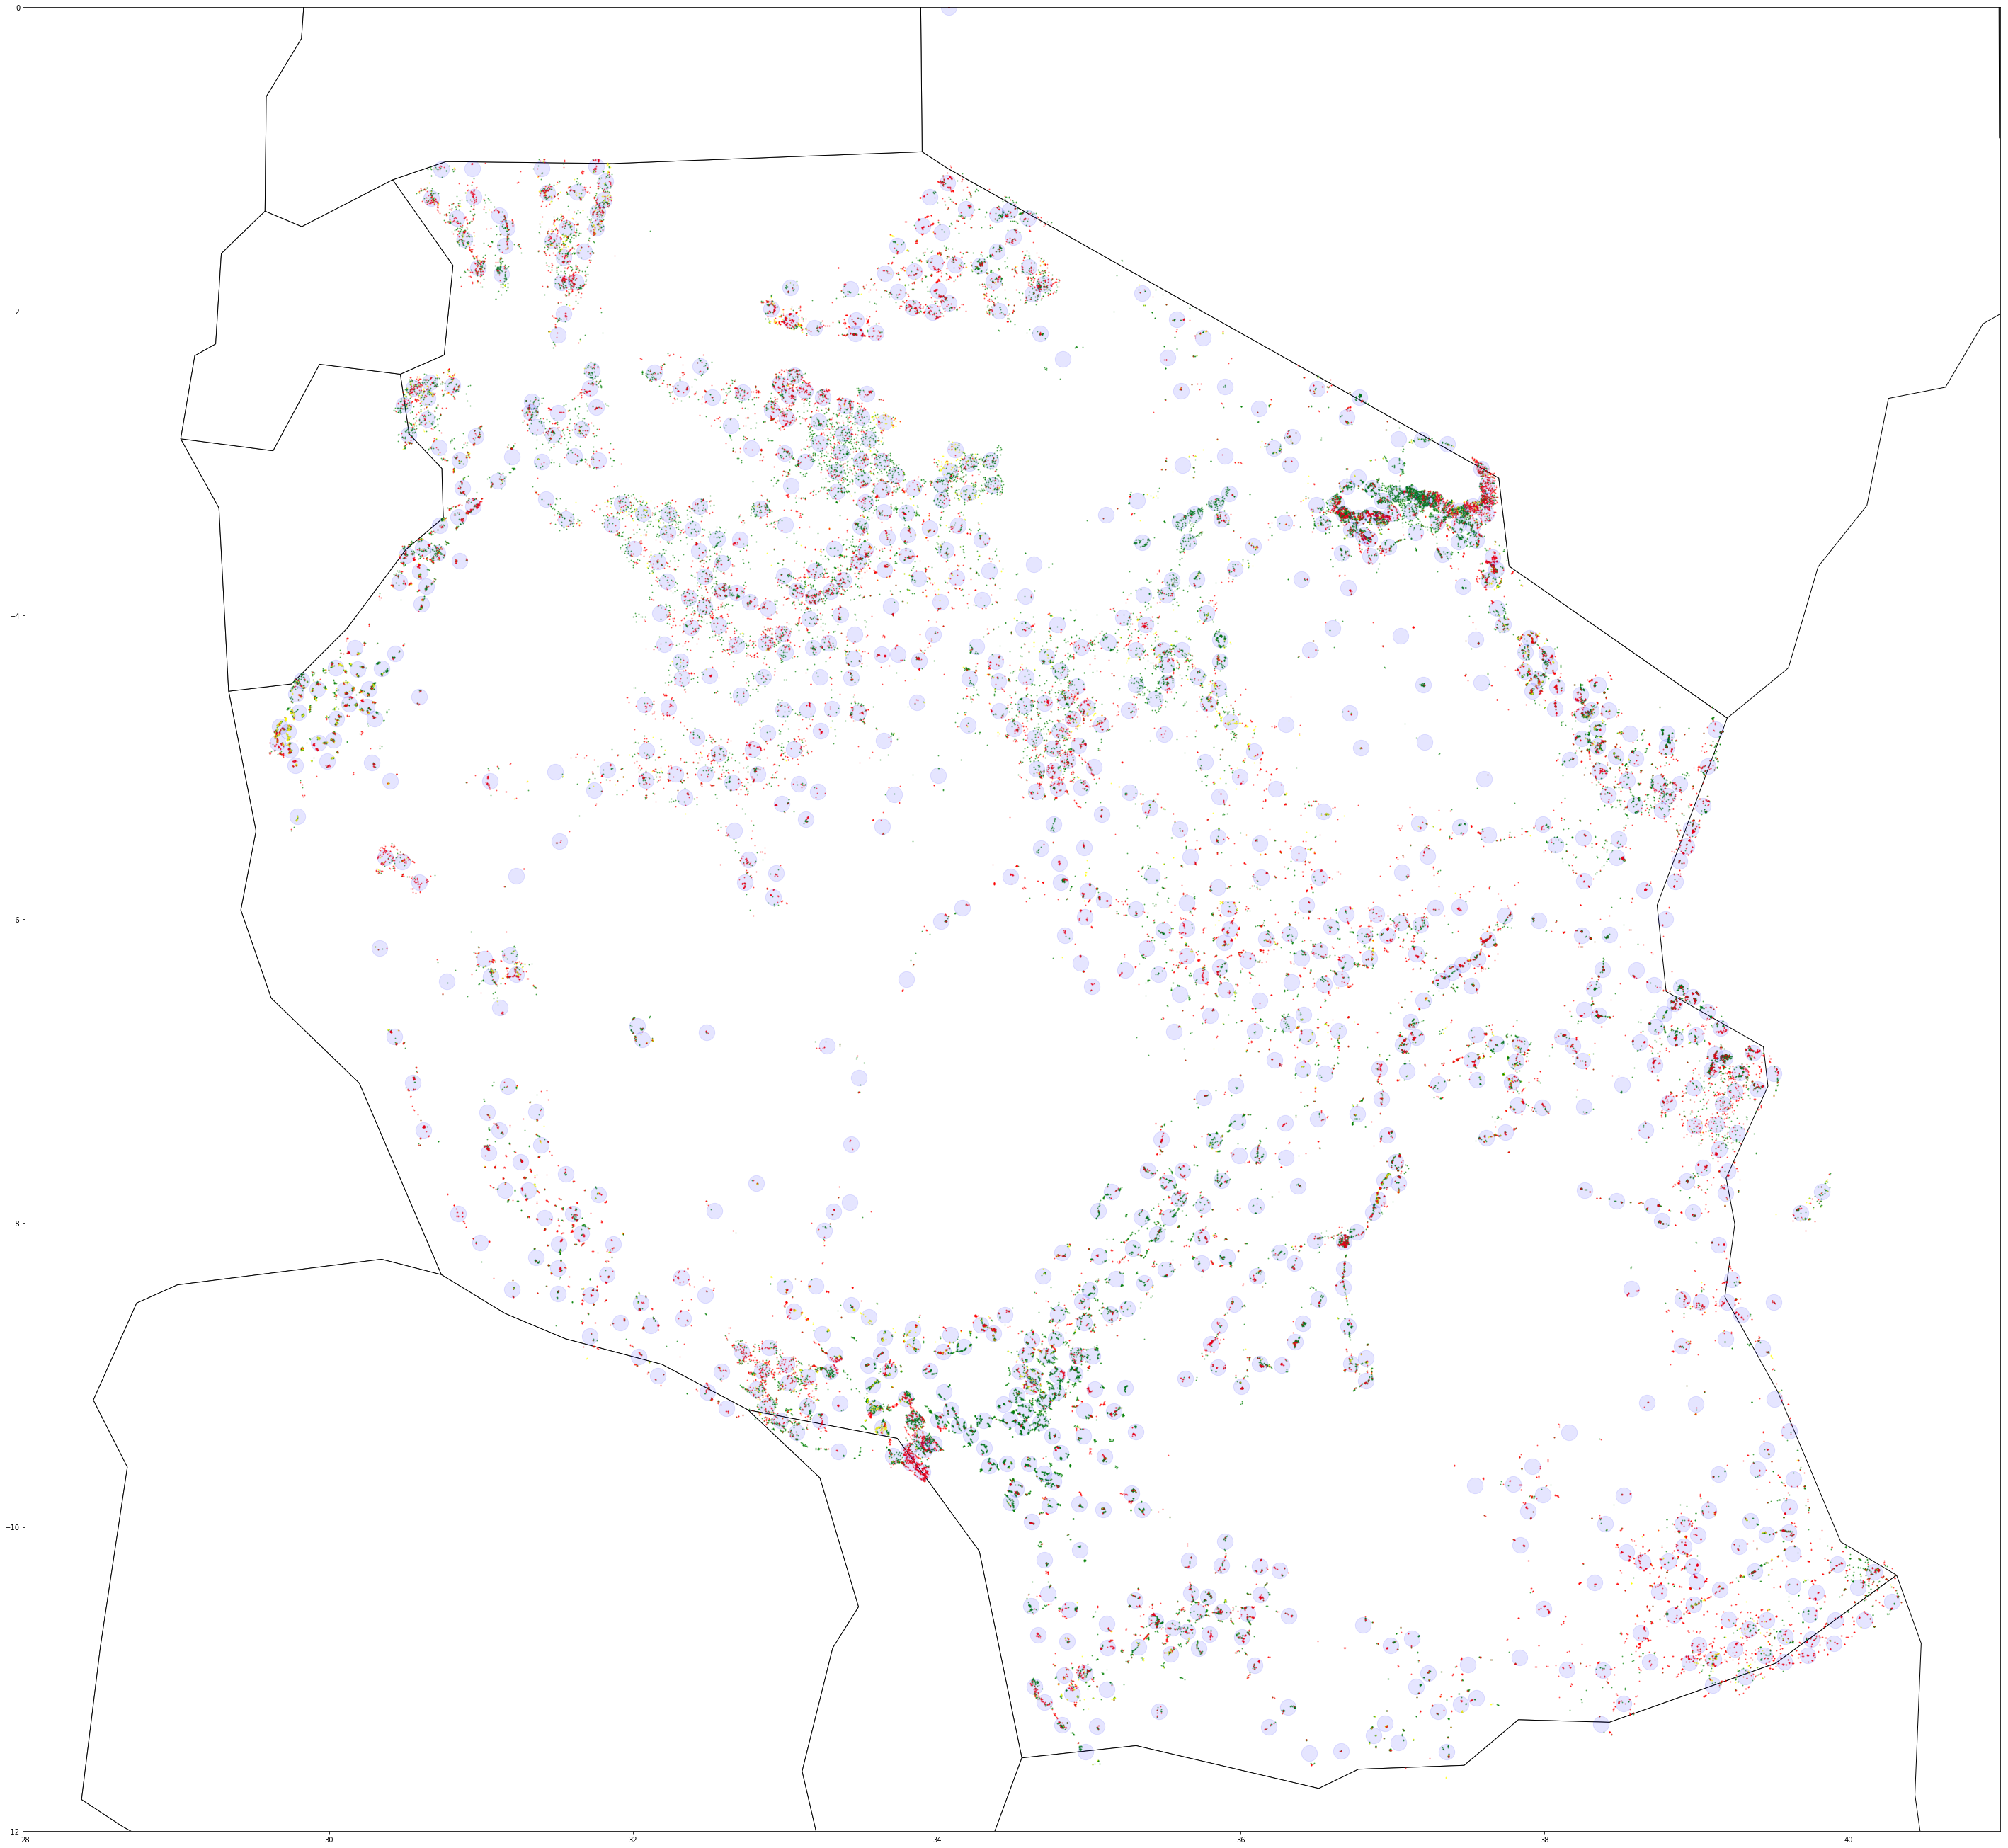

In [0]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

# We restrict to Africa.
ax = world[world.continent == 'Africa'].plot(
    color='white', edgecolor='black')

ax.scatter(functional['longitude'], functional['latitude'],
           c='green',alpha=.5, s=1)

ax.scatter(repair['longitude'], repair['latitude'],
           c='yellow', alpha=.5, s=1)

ax.scatter(broken['longitude'], broken['latitude'],
           c='red', alpha=.5, s=1)

ax.scatter(clusters[0], clusters[1], c='blue', alpha=.1, s=500)

plt.ylim(-12, 0)
plt.xlim(28,41)

plt.show()

In [0]:
gdf['geo_labels'] = labels

In [0]:
!pip install category_encoders

In [0]:
gdf.columns

Index(['key_0', 'id_x', 'amount_tsh', 'date_recorded', 'funder', 'gps_height',
       'installer', 'longitude', 'latitude', 'wpt_name', 'num_private',
       'basin', 'subvillage', 'region', 'region_code', 'district_code', 'lga',
       'ward', 'population', 'public_meeting', 'recorded_by',
       'scheme_management', 'scheme_name', 'permit', 'construction_year',
       'extraction_type', 'extraction_type_group', 'extraction_type_class',
       'management', 'management_group', 'payment', 'payment_type',
       'water_quality', 'quality_group', 'quantity', 'quantity_group',
       'source', 'source_type', 'source_class', 'waterpoint_type',
       'waterpoint_type_group', 'geometry', 'id_y', 'status_group',
       'geo_labels'],
      dtype='object')

In [0]:
def reverse_cardinality_check(n, df):
  """
  Given a cardinality limit (n) and a dataframe this function will search the
  dataframe for features above the cardinality limit, then create a dict
  from the results
  """
  
  feature_list = []
  
  cardinality_value = []
  
  for _ in range(len(df.columns)):
    if len(df[df.columns[_]].value_counts()) > n:
      
      feature_list.append(df.columns[_])
      
      cardinality_value.append(len(df[df.columns[_]].value_counts()))
                               
        
  feature_dict = dict(zip(feature_list, cardinality_value))
  
  return feature_dict

In [0]:
X = pd.DataFrame(gdf.drop(columns=['status_group', 'geometry', 'key_0', 'id_x', 'date_recorded', 'funder', 'gps_height', 'id_y', 'installer',
                                  'longitude','latitude', 'population', 'scheme_name', 'subvillage', 'ward', 'wpt_name']))
X.columns             

Index(['amount_tsh', 'num_private', 'basin', 'region', 'region_code',
       'district_code', 'lga', 'public_meeting', 'recorded_by',
       'scheme_management', 'permit', 'construction_year', 'extraction_type',
       'extraction_type_group', 'extraction_type_class', 'management',
       'management_group', 'payment', 'payment_type', 'water_quality',
       'quality_group', 'quantity', 'quantity_group', 'source', 'source_type',
       'source_class', 'waterpoint_type', 'waterpoint_type_group',
       'geo_labels'],
      dtype='object')

In [0]:
reverse_cardinality_check(150, X)

{'geo_labels': 1000}

In [0]:
y = pd.Series(gdf['status_group'])

In [0]:
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import RobustScaler
import category_encoders as ce
from sklearn.impute import SimpleImputer

In [0]:
pipeline = make_pipeline(ce.OneHotEncoder(),SimpleImputer(),RobustScaler(), RandomForestClassifier(max_depth=5, n_estimators=500))

In [0]:
pipeline.fit(X, y)

Pipeline(memory=None,
     steps=[('onehotencoder', OneHotEncoder(cols=['basin', 'region', 'lga', 'public_meeting', 'recorded_by', 'scheme_management', 'permit', 'extraction_type', 'extraction_type_group', 'extraction_type_class', 'management', 'management_group', 'payment', 'payment_type', 'water_quality', 'quality_group', '...obs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False))])

In [0]:
from sklearn.metrics import accuracy_score

predictions = pipeline.predict(X)

accuracy_score(y, predictions)

0.7126599326599327